In [1]:
from read_mem import *
import matplotlib.pyplot as plt
import pathlib
import os
from parse import parse

/home/bastian/D1/registration/poissonslurm/438464_log_python_srun.txt 
/home/bastian/D1/registration/poissonslurm/438465_log_python_srun.txt 
/home/bastian/D1/registration/poissonslurm/438467_log_python_srun.txt 
/home/bastian/D1/registration/poissonslurm/438468_log_python_srun.txt 
/home/bastian/D1/registration/poissonslurm/438346_log_python_srun.txt 
/home/bastian/D1/registration/poissonslurm/438347_log_python_srun.txt 
/home/bastian/D1/registration/poissonslurm/438351_log_python_srun.txt 
/home/bastian/D1/registration/poissonslurm/438353_log_python_srun.txt 
/home/bastian/D1/registration/poissonslurm/438354_log_python_srun.txt 
/home/bastian/D1/registration/poissonslurm/438355_log_python_srun.txt 
/home/bastian/D1/registration/poissonslurm/438356_log_python_srun.txt 
/home/bastian/D1/registration/poissonslurm/438357_log_python_srun.txt 
/home/bastian/D1/registration/poissonslurm/438358_log_python_srun.txt 
/home/bastian/D1/registration/poissonslurm/438359_log_python_srun.txt 
/home/

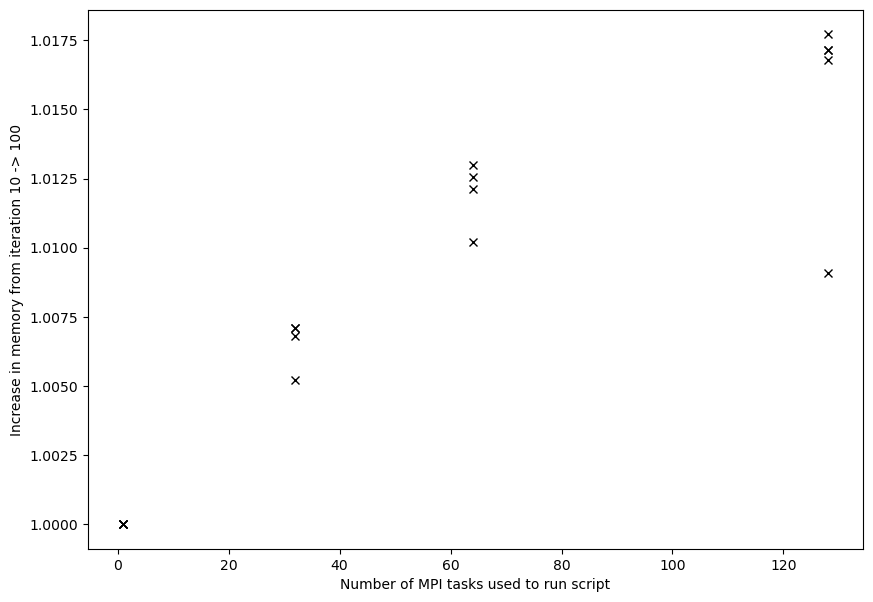

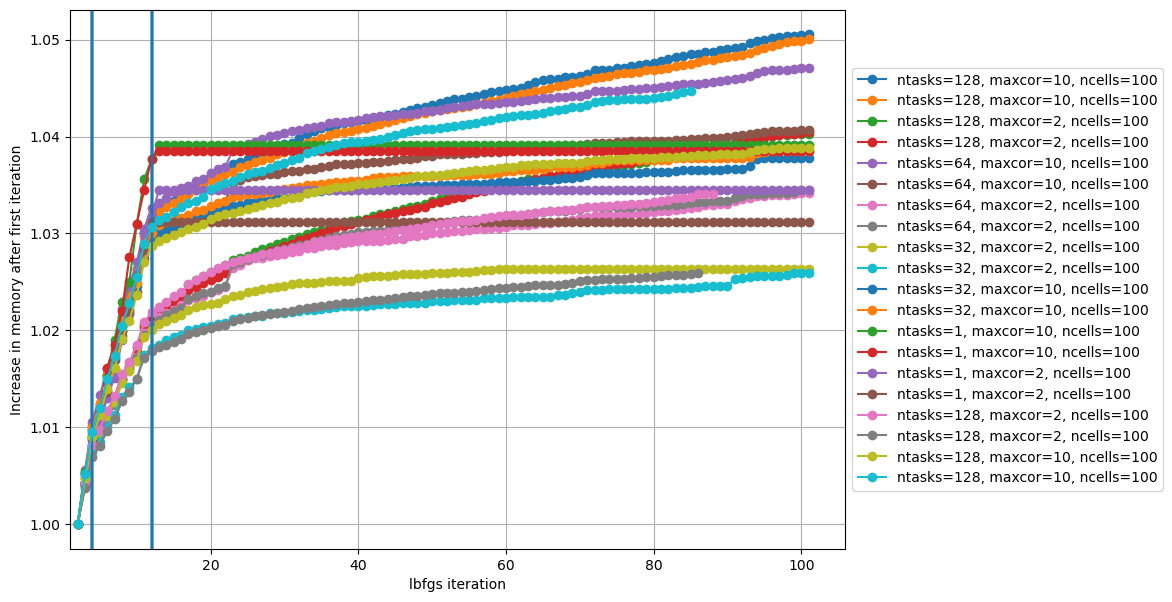

In [3]:
path = pathlib.Path("/home/bastian/D1/registration/poissonslurm/")

slurmids = set([int(x.replace(".out", "")) for x in os.listdir(path) if ".out" in x])

fig2 = plt.figure(figsize=(10,7))
ax2 = plt.subplot(111)

fig = plt.figure(figsize=(10,7))
ax = plt.subplot(111)

colors = {1: "darkblue", 2: "blue", 4:"deepskyblue", 8:"slategrey", 10: "k"}

for slurmid in slurmids:

    filename = path / (str(slurmid) + "_log_python_srun.txt")

    mema, outfoldername,_ = read_memory(filename)


    check_for_error(path / (str(slurmid) + ".out"))
    check(filename)#path / (str(slurmid) + ".out"))

    ntasks, maxcor, meshn = read(path / (str(slurmid) + ".out"))

    outfoldername = outfoldername.replace("\n", "").replace(" ", "")
    
    print(filename, outfoldername)
    try:
        mema[:,0]
        # print(mema[:, 0])
    except IndexError:
        print(outfoldername, "probably still running init? Continue.")
        continue

    marker = "o"
    linestyle = "-"



    fac = 1
    fac = mema[0,1]

    # if  str(maxcor).replace("\n", "") == "10":
    #     continue

    # if str(ntasks).replace("\n", "") != "64":
    #     continue

    plt.axvline(4)
    
    plt.axvline(12)
    plt.plot(mema[:,0], mema[:,1] / fac, marker=marker, 
            # color=color, linestyle=linestyle, 
            # label="maxcor="+res[1] + "," + res[2].replace("none", "no preconditioning").replace("preconditioning_nosmoothen", "preconditioning = nosmoothen"), 
            # label=outfoldername + "," + str(slurmid),
            label="ntasks=" + str(ntasks).replace("\n", "") + ", maxcor=" + str(maxcor).replace("\n", "")+ ", ncells=" + str(meshn).replace("\n", "")
            # label=slurmid,
            )
    

    if mema.shape[0] > 99:

        color ="k"
        n = 12
        # if  str(maxcor).replace("\n", "") == "10":
        #     n = 12
        #     color = "red"
        # else:
        #     color = "blue"
        #     n = 4
        ax2.plot(float(str(ntasks).replace("\n", "")), mema[-1,1] / mema[n,1], marker="x", color=color)


ax2.set_ylabel("Increase in memory from iteration 10 -> 100")
ax2.set_xlabel("Number of MPI tasks used to run script")

plt.legend()
plt.xlabel("lbfgs iteration")
if fac == 1:
    plt.ylabel("memory (TB)")
else:    
    plt.ylabel("Increase in memory after first iteration")
plt.xlim(1, None)
# plt.yticks([1 + x /1000 for x in range(0, 22, 2)])
plt.grid()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.xlim(2, 5)
plt.show()